Overlap between dist and dist1:
Total Overlapping Coordinates: 0
Percentage of Overlap: 0.0 %
Overlap between dist and dist2:
Total Overlapping Coordinates: 65
Percentage of Overlap: 9.923664122137405 %
Overlap between dist and dist3:
Total Overlapping Coordinates: 0
Percentage of Overlap: 0.0 %
matched


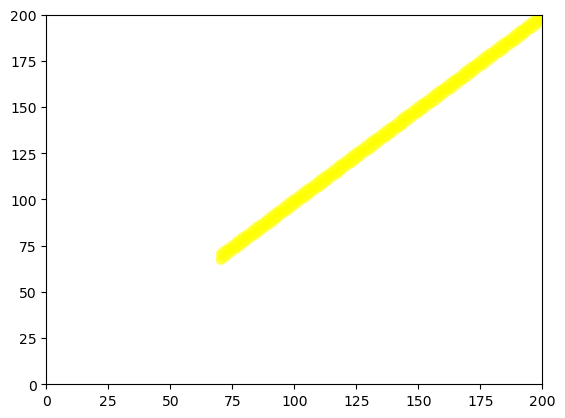

In [4]:
import librosa
import numpy as np
from fastdtw import fastdtw
import matplotlib.pyplot as plt

def extract_mfcc(audio_file):
    audio, sample_rate = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate)
    return mfcc

def dtw_distance(mfcc1, mfcc2):
    _, dist = fastdtw(mfcc1.T, mfcc2.T)
    return dist

def plot_dtw(dist, color, label):
    plt.plot([0, 200], [0, 200], color="purple")
    for i in dist:
        plt.plot(i[0], i[1], marker='o', color=color, alpha=0.3, label=label)

def plot_ref(ref, color, label, line_width=2.0, vertical_shift=3):
    for i in ref:
        plt.plot(i[0], i[1] - vertical_shift, marker='o', color=color, alpha=0.3, label=label)
#     for i in ref:
#         plt.plot(i[0], i[1] + vertical_shift, marker='o', color=color, alpha=0.3, label=label)

def find_overlap(dist, ref_dist):
    total_overlap = sum(1 for i in dist if i in ref_dist)
    percentage = (total_overlap / len(dist)) * 100
    return total_overlap, percentage

voiceprints = {
    "user1": extract_mfcc("D:\\dataset\\tushar1.wav"),
    "user2": extract_mfcc("D:\\dataset\\tushar2.wav"),
    "user3": extract_mfcc("D:\\dataset\\tushar3.wav")
}

verification_sample = extract_mfcc("D:\\dataset\\tushar_test.wav")
threshold = 1000

ref1 = [(x, x - 2) for x in range(70, 201)] + [(x, x - 1) for x in range(70, 201)]  # Adjusted coordinates for ref1
ref2 = [(x, x + 2) for x in range(70, 201)] + [(x, x + 1) for x in range(70, 201)]  # Adjusted coordinates for ref2

dist = [(x, x) for x in range(70, 201)] + ref1 + ref2
dist1 = dtw_distance(voiceprints["user1"], verification_sample)
dist2 = dtw_distance(voiceprints["user2"], verification_sample)
dist3 = dtw_distance(voiceprints["user3"], verification_sample)

plt.ylim(0, 200)
plt.xlim(0, 200)

# Plot for the references with vertical shift
plot_ref(ref1, "yellow", "Reference", line_width=2.0, vertical_shift=1)
plot_ref(ref2, "yellow", "Reference", line_width=2.0, vertical_shift=1)

plot_dtw(dist, "purple", "Reference")
plot_dtw(dist1, "blue", "User1")
plot_dtw(dist2, "red", "User2")
plot_dtw(dist3, "green", "User3")

overlap_dist_dist1, percentage_dist_dist1 = find_overlap(dist, dist1)
overlap_dist_dist2, percentage_dist_dist2 = find_overlap(dist, dist2)
overlap_dist_dist3, percentage_dist_dist3 = find_overlap(dist, dist3)

print("Overlap between dist and dist1:")
print("Total Overlapping Coordinates:", overlap_dist_dist1)
print("Percentage of Overlap:", percentage_dist_dist1, "%")

print("Overlap between dist and dist2:")
print("Total Overlapping Coordinates:", overlap_dist_dist2)
print("Percentage of Overlap:", percentage_dist_dist2, "%")

print("Overlap between dist and dist3:")
print("Total Overlapping Coordinates:", overlap_dist_dist3)
print("Percentage of Overlap:", percentage_dist_dist3, "%")

if any(overlap > 25 for overlap in [overlap_dist_dist1, overlap_dist_dist2, overlap_dist_dist3]):
    print("matched")
else:
    print("not matched")

plt.show()
